In [ ]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

import matplotlib.dates as mdates
import matplotlib.cbook as cbook

# File to Load (Remember to Change These)
file_to_load = "./Resources/County_MedianListingPrice_AllHomes.csv"
mlp_data = pd.read_csv(file_to_load, encoding='ISO-8859-1')

# Read mlp File and store into Pandas data frame
mlp_data = pd.read_csv(file_to_load, encoding='ISO-8859-1')
mlp_data.head()

In [2]:
#deleting columns not required
del mlp_data['Metro'],
del mlp_data['StateCodeFIPS'],
del mlp_data['MunicipalCodeFIPS'],
del mlp_data['SizeRank']
#del mlp_data['2019-05']
mlp_data.head()

,RegionName,State,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,...,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05
0,Los Angeles County,CA,399000.0,389000.0,399000.0,398800.0,399000.0,398500.0,395000.0,399000.0,...,659000.0,660000.0,662050.0,659000.0,649999.0,649900.0,650000.0,665000.0,675000.0,679000.0
1,Cook County,IL,244900.0,249000.0,249000.0,249000.0,245000.0,245000.0,239000.0,237900.0,...,288900.0,289000.0,285000.0,280176.5,278000.0,280000.0,289900.0,299000.0,300000.0,300000.0
2,Harris County,TX,149900.0,152900.0,154755.0,154900.0,155000.0,155000.0,151000.0,150000.0,...,278000.0,279500.0,279000.0,279000.0,275600.0,276995.0,279000.0,279900.0,285000.0,283907.0
3,Maricopa County,AZ,179900.0,175900.0,174900.0,169900.0,165000.0,159900.0,154989.5,152900.0,...,308000.0,305990.0,309900.0,308000.0,307945.0,309990.0,310000.0,314900.0,317990.0,318000.0
4,San Diego County,CA,399000.0,399000.0,399500.0,399990.0,400000.0,399900.0,399900.0,401900.0,...,649000.0,649000.0,637000.0,635000.0,635000.0,635000.0,639000.0,644000.0,650000.0,659650.0


In [3]:
topcounties_allstates_05_2019 = mlp_data.nlargest(5, ['2019-05']) 
topcounties_allstates_05_2019

,RegionName,State,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,...,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05
1828,Pitkin County,CO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2495000.0,2295000.0,2495000.0,2580000.0,2499500.0,2597500.0,2495000.0,2435000.0,2450000.0,2299250.0
19,New York County,NY,850000.0,830000.0,835000.0,825000.0,825000.0,800000.0,799000.0,795000.0,...,1500000.0,1545000.0,1539000.0,1550000.0,1580000.0,1575000.0,1550000.0,1550000.0,1567500.0,1575000.0
1675,Teton County,WY,1375000.0,1375000.0,1332500.0,1295000.0,1350000.0,1375000.0,1362500.0,1325000.0,...,1649000.0,1707475.0,1750000.0,1775000.0,1895000.0,1825000.0,1750000.0,1847000.0,1749000.0,1575000.0
81,San Mateo County,CA,719975.0,699880.0,699000.0,709950.0,729000.0,740000.0,748000.0,749888.0,...,1389000.0,1395000.0,1389000.0,1392500.0,1346500.0,1308000.0,1325000.0,1399000.0,1479000.0,1468000.0
1858,Dukes County,MA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1397500.0,1399500.0,1395000.0,1395000.0,1395000.0,1467000.0,1395000.0,1390000.0,1297000.0,1444000.0


In [4]:

year_month=list(topcounties_allstates_05_2019.iloc[:,3:].columns.values)

print (len(year_month))
print (type(year_month))
topcounties_allstates_05_2019.iloc[0:1,3:].transpose()
topcounties_allstates_05_2019.iloc[2:3,1:2]
topcounties_allstates_05_2019['RegionName'].values[0]

112
<class 'list'>


'Pitkin County'

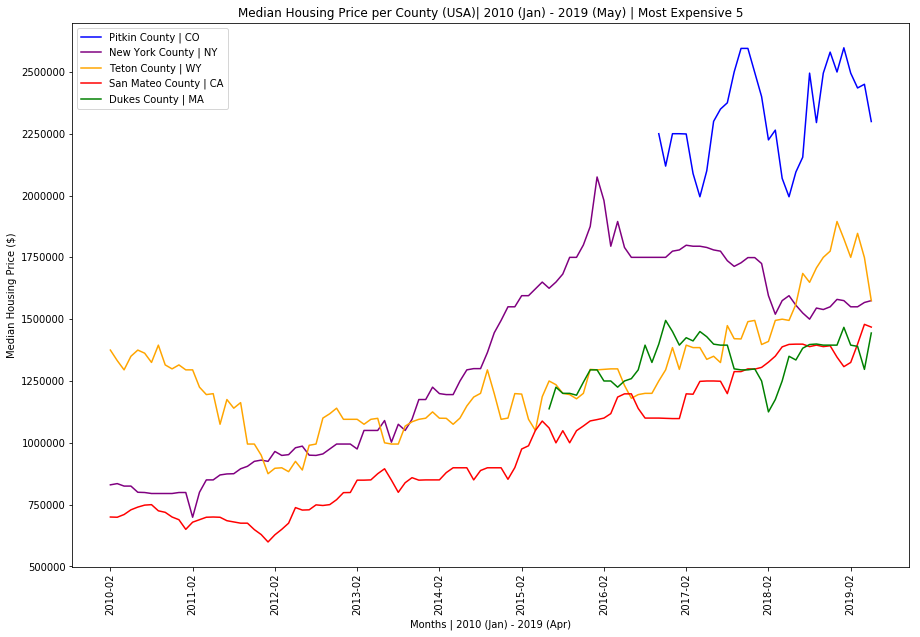

In [11]:
plt.figure(figsize=(15,10))
#fig, ax = plt.subplots()

plt.plot(year_month, topcounties_allstates_05_2019.iloc[0:1,3:].transpose(), label = topcounties_allstates_05_2019['RegionName'].values[0]+' | '+topcounties_allstates_05_2019['State'].values[0], color='blue')
plt.plot(year_month, topcounties_allstates_05_2019.iloc[1:2,3:].transpose(), label = topcounties_allstates_05_2019['RegionName'].values[1]+' | '+topcounties_allstates_05_2019['State'].values[1], color='purple')
plt.plot(year_month, topcounties_allstates_05_2019.iloc[2:3,3:].transpose(), label = topcounties_allstates_05_2019['RegionName'].values[2]+' | '+topcounties_allstates_05_2019['State'].values[2], color='orange')
plt.plot(year_month, topcounties_allstates_05_2019.iloc[3:4,3:].transpose(), label = topcounties_allstates_05_2019['RegionName'].values[3]+' | '+topcounties_allstates_05_2019['State'].values[3], color='red')
plt.plot(year_month, topcounties_allstates_05_2019.iloc[4:5,3:].transpose(), label = topcounties_allstates_05_2019['RegionName'].values[4]+' | '+topcounties_allstates_05_2019['State'].values[4], color='green')

plt.legend(loc="best")
plt.title("Median Housing Price per County (USA)| 2010 (Jan) - 2019 (May) | Most Expensive 5")
plt.xlabel("Months | 2010 (Jan) - 2019 (Apr)")
plt.ylabel("Median Housing Price ($)")
plt.xticks(year_month[0::12], rotation=90)
#lt.locator_params(axis='x', nbins=10)

plt.savefig("./Images/MedianHousingPricePerCountyTop5_AllStates_USA.png")
plt.show()



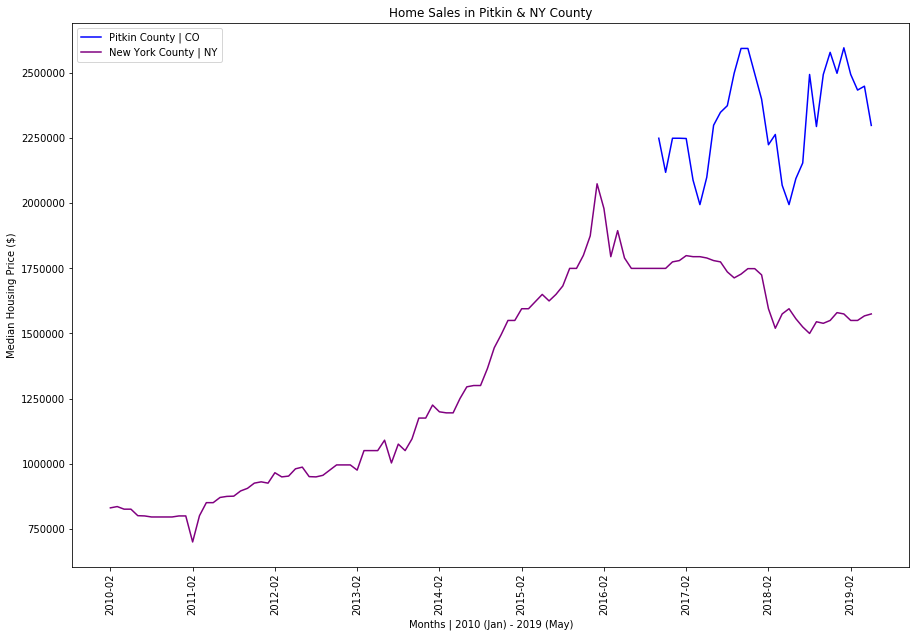

In [12]:
plt.figure(figsize=(15,10))
plt.plot(year_month, topcounties_allstates_05_2019.iloc[0:1,3:].transpose(), label = topcounties_allstates_05_2019['RegionName'].values[0]+' | '+topcounties_allstates_05_2019['State'].values[0], color='blue')
plt.plot(year_month, topcounties_allstates_05_2019.iloc[1:2,3:].transpose(), label = topcounties_allstates_05_2019['RegionName'].values[1]+' | '+topcounties_allstates_05_2019['State'].values[1], color='purple')
plt.legend(loc="best")
plt.title("Home Sales in Pitkin & NY County")
plt.xlabel("Months | 2010 (Jan) - 2019 (May)")
plt.ylabel("Median Housing Price ($)")
plt.xticks(year_month[0::12], rotation=90)
plt.savefig("./Images/HomeSalesinCPitkin&NYCounty.png")
plt.show()